In [1]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
import os

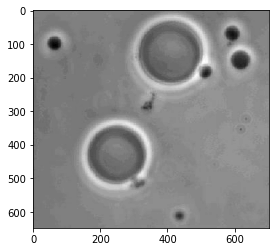

In [2]:
img = Image.open("E:/lectures/2020 digital image processing/homework4_lecture10/figure.tif")
plt.figure()
plt.imshow(img, cmap ='gray');

In [3]:
def OTSU(img_array):            #ndarray, param
    height = img_array.shape[0]
    width = img_array.shape[1]
    count_pixel = np.zeros(256)

    for i in range(height):
        for j in range(width):
            count_pixel[int(img_array[i][j])] += 1 

    #histrogram
    fig = plt.figure()        
    ax = fig.add_subplot(111)
    ax.bar(np.linspace(0, 255, 256), count_pixel)
    ax.set_xlabel("pixels")
    ax.set_ylabel("num")
    plt.show()
    
    max_variance = 0.0
    best_thresold = 0
    for thresold in range(256):
        n0 = count_pixel[ : thresold].sum()
        n1 = count_pixel[thresold:].sum()
        w1 = n0 / (height * width)
        w2 = n1 / (height * width)
        
        m1 = 0.0
        m2 = 0.0
        for i in range(thresold):
            m1 += i * count_pixel[i]
        for j in range(thresold, 256):
            m2 += j * count_pixel[j]

        m1 = m1/w1
        m2 = m2/w2
        
        m_global = m1 * w1 + m2 * w2
        tmp_var = w1 * np.power((m_global - m1), 2) + w2 * np.power((m_global - m2), 2)

        if tmp_var > max_variance:
            best_thresold = thresold
            max_variance = tmp_var

    return best_thresold

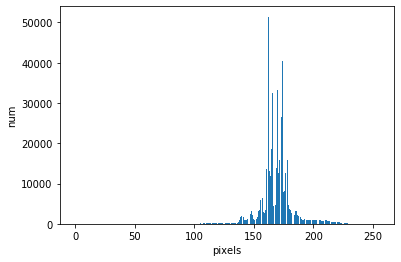

The best threshold =  182


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars


In [4]:
img = np.asarray(img, dtype=np.uint8)
thres = OTSU(img);
print("The best threshold = ", thres)

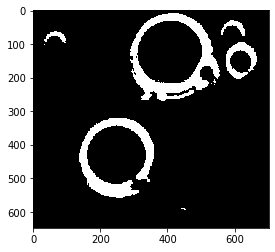

In [5]:
img_final = img > thres;
plt.figure()
plt.imshow(img_final, cmap ='gray')